# Loan characteristics and their effects on Borrower's Rate
## by ِAbdelrahman Ayman

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of prosper loans that could be used to predict the borrower's rate. The main focus was on Term, Loan Original Amount, Employment Status Duration, Employment Status, and Prosper rating.

## Dataset Overview

>  There are 113,937 loans in the dataset with 81 features. I have focused on the relation between Borrower's Rate and Term, Loan Original Amount, Employment Status Duration, Employment Status, and Prosper Rating,

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#convert prosper rating into ordered categorical types
rating = ['AA','A','B','C','D','E','HR']
rating = pd.api.types.CategoricalDtype(ordered = True, categories = rating )
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(rating)

In [4]:
#convert employment status into ordered categorical types
status = ['Full-time','Part-time','Employed','Self-employed','Retired','Other','Not employed','Not available']
status = pd.api.types.CategoricalDtype(ordered = True, categories = status )
df['EmploymentStatus'] = df['EmploymentStatus'].astype(status)

## The distribution of Borrower rate

> the distribution of Borrower Rate is multimodal with peak around 0.17 with a spike at 0.3.

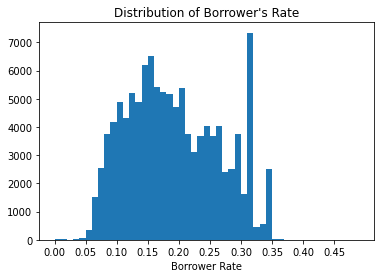

In [5]:
bins = np.arange( df['BorrowerRate'].min() , df['BorrowerRate'].max() , 0.01 )
color = sb.color_palette()[0]
plt.hist(data=df,x='BorrowerRate',bins = bins , color = color );
x = np.arange(0,0.5,0.05)
plt.xticks(x);
plt.xlabel('Borrower Rate');
plt.title("Distribution of Borrower's Rate");

## The distribution of Original Loan Amount
> From the Figure we can notice that below 1000 dollars borrowers tend to get their loan at multiple of 1000 with a big spike at 4000 .
and after 1000 dollars they tend to get their loan at multiple of 5000

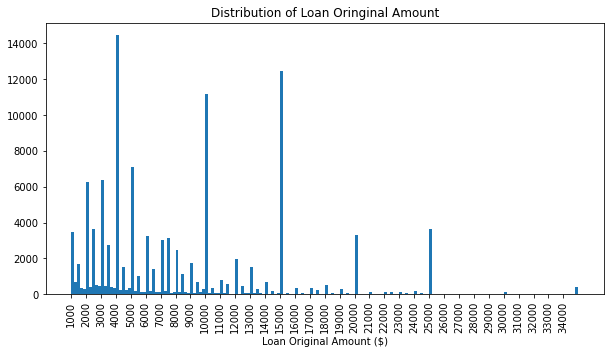

In [6]:
plt.figure(figsize=[10,5])
bins = np.arange(1000,df['LoanOriginalAmount'].max()+200,200)
plt.hist(data=df , x='LoanOriginalAmount',bins = bins);
plt.xticks(np.arange(1000,35000,1000),rotation = 90);
plt.xlabel('Loan Original Amount ($)');
plt.title("Distribution of Loan Oringinal Amount");

## Borrower Rate vs LoanOriginal Amount
> we can see there is a negative correlation between the borrower rate and loan original amount.

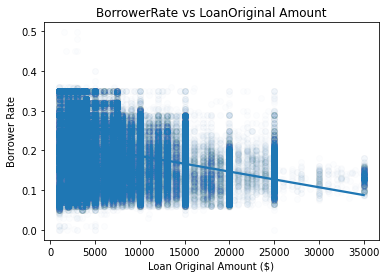

In [7]:
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
plt.title('BorrowerRate vs LoanOriginal Amount');
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('Borrower Rate');

# Borrower rate by Term
As we can see the Term doesnot affect the Borrower rate that much as the mean of Borrower rate for different Loan Term is very close to each other.

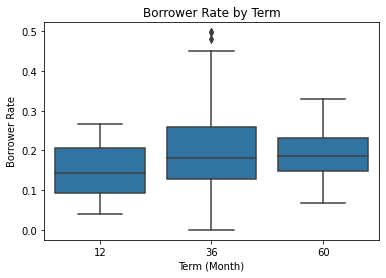

In [8]:
sb.boxplot(data= df, y ='BorrowerRate',x = 'Term' , color = sb.color_palette()[0]);
plt.title('Borrower Rate by Term');
plt.xlabel('Term (Month)');
plt.ylabel('Borrower Rate');

# Borrower Rate by Prosper Rating and Term
>The figure shows that the Borrower Rate decreases with the higher Prosper Rating and the higher the term is the higher the Borrower Rate but not by far also we can see that For the E prosper rating the 36 and 60 months loans nearly have the same Borrower Rate.

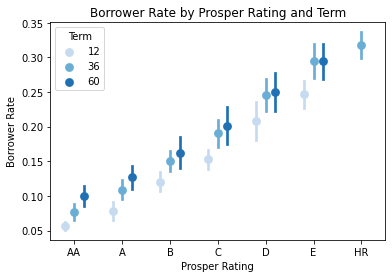

In [9]:
sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd');
plt.title('Borrower Rate by Prosper Rating and Term');
plt.xlabel('Prosper Rating');
plt.ylabel('Borrower Rate');
